<a href="https://colab.research.google.com/github/Chromatina/su-mt4007/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


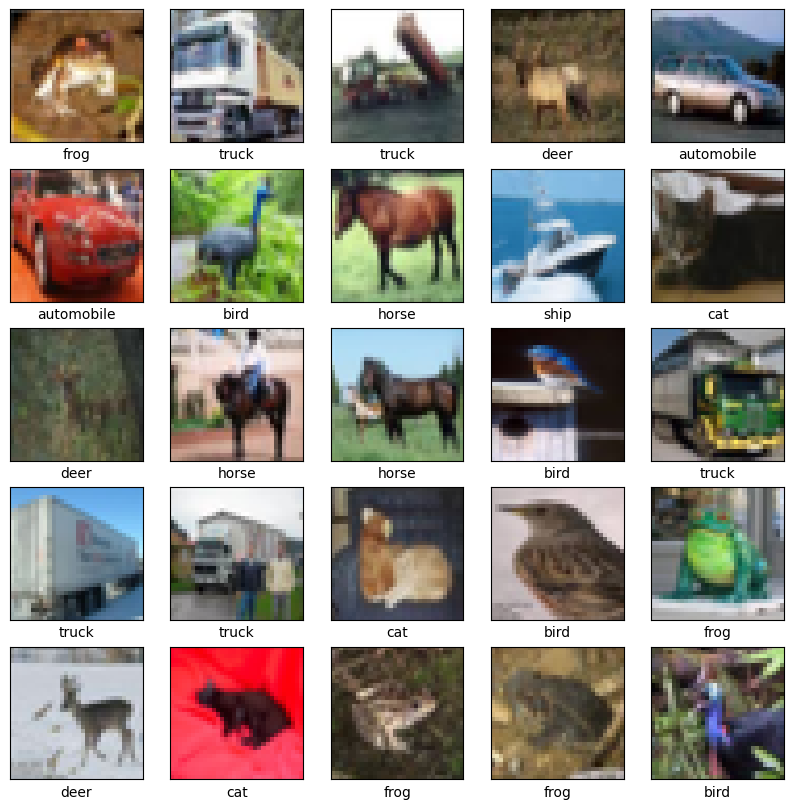

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 40ms/step - accuracy: 0.3554 - loss: 1.7486 - val_accuracy: 0.5412 - val_loss: 1.2638
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.5696 - loss: 1.2099 - val_accuracy: 0.6330 - val_loss: 1.0385
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.6349 - loss: 1.0304 - val_accuracy: 0.6298 - val_loss: 1.0506
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.6736 - loss: 0.9258 - val_accuracy: 0.6764 - val_loss: 0.9280
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 41ms/step - accuracy: 0.7017 - loss: 0.8473 - val_accuracy: 0.6629 - val_loss: 0.9623
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.7205 - loss: 0.7981 - val_accuracy: 0.6909 - val_loss: 0.8777
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7414 - loss: 0.7406 - val_accuracy: 0.6939 - val_loss: 0.8984
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 39ms/step - accuracy: 0.7565 -

313/313 - 3s - 10ms/step - accuracy: 0.7023 - loss: 0.8922


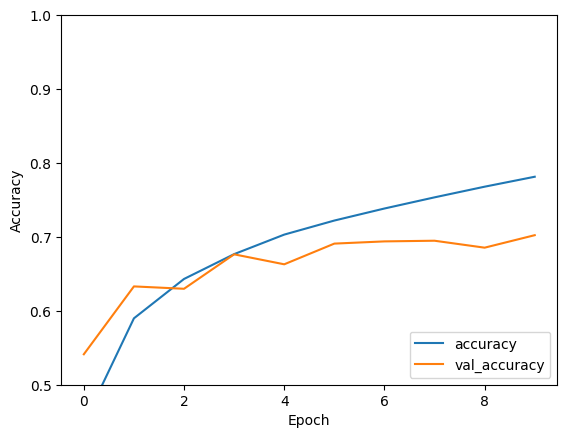

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.7023000121116638


# Task 2

In [ ]:
model_tanh = models.Sequential()
model_tanh.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(32, 32, 3)))
model_tanh.add(layers.MaxPooling2D((2, 2)))
model_tanh.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model_tanh.add(layers.MaxPooling2D((2, 2)))
model_tanh.add(layers.Conv2D(64, (3, 3), activation='tanh'))

In [ ]:
model_tanh.add(layers.Flatten())
model_tanh.add(layers.Dense(64, activation='tanh'))
model_tanh.add(layers.Dense(10))

In [ ]:
model_tanh.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_tanh = model_tanh.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.4230 - loss: 1.6193 - val_accuracy: 0.5631 - val_loss: 1.2426
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.6008 - loss: 1.1495 - val_accuracy: 0.6189 - val_loss: 1.0866
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.6403 - loss: 1.0349 - val_accuracy: 0.6393 - val_loss: 1.0507
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6662 - loss: 0.9619 - val_accuracy: 0.6417 - val_loss: 1.0432
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6883 - loss: 0.9039 - val_accuracy: 0.6489 - val_loss: 1.0274
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7021 - loss: 0.8558 - val_accuracy: 0.6637 - val_loss: 0.9880
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7220 - loss: 0.8048 - val_accuracy: 0.6710 - val_loss: 0.9651
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7341 -

313/313 - 4s - 14ms/step - accuracy: 0.6675 - loss: 1.1231


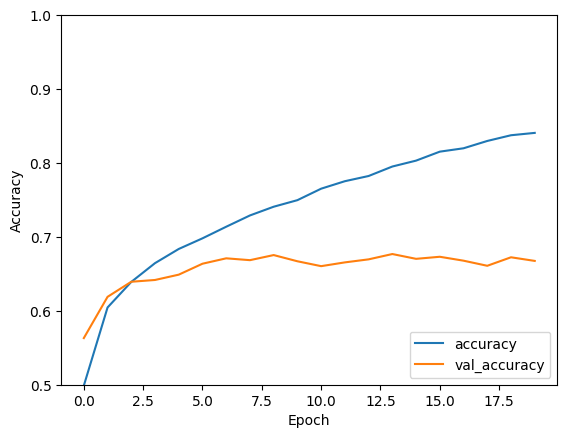

In [ ]:
plt.plot(history_tanh.history['accuracy'], label='accuracy')
plt.plot(history_tanh.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss_tanh, test_acc_tanh = model_tanh.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc_tanh)

0.6675000190734863


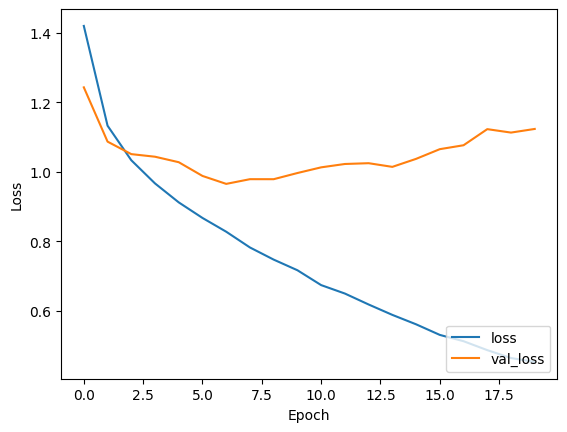

In [ ]:
plt.plot(history_tanh.history['loss'], label='loss')
plt.plot(history_tanh.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

If we compare the test accuracy between the two models, we see that they are both very close, although the test accuracy using ReLU is slightly higher than when using the tanh activation function. One reason for this is that tanh has the problem of vanishing gradients, where the gradient of the function at very large or very small negative values becomes almost zero which means that there is no gradient flow to the network and the earlier layers stop learning. Due to this ReLU often reaches its peak accuracy in less epochs than tanh. Another reason is that the calculations involving tanh requires the computer to calculate exponents which are much more computationally expensive than the calculations surrounding the ReLU function. Because of this, each epoch finishes faster which means that we can train the model longer and reach a conclusion much faster.

# Task 3

The inputs to our network is the shape (32, 32, 3) which means that each image is 32 pixels wide and 32 pixels tall and that each image has 3 channels, R, G and B. When we add our first convolutional layer with the line
```
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
```
we run a filter with size 3x3(x3) (we do not specify it in the code but each filter needs to have its depth equal to the number of channels) over the images which condenses them to 30x30 pixels since the filter can not center itself on the outer edges of the images without "falling off". Because of this and because the filter moves one pixel at a time by default (the stride of Conv2D is defaulted to 1), the output image is 30x30 pixels. When we defined our first convolutional layer we also specified the number of channels we wanted the output to have, namely 32 and this means that the computer creates 32 different 3x3x3 filters with different weights that all go over the images. When we apply a convolutional layer a second time
```
model.add(layers.Conv2D(64, (3, 3), activation='relu')),
```
we again use a filter that is 3x3 pixels, although this time the depth of the filter equals the number of channels the previous layer output, which is 32 from this line
```
model.add(layers.MaxPooling2D((2, 2))).
```
It is worth noting that the maxpooling layer never changed the number of channels, but outputted the same number that the first convolutional layer outputted. When applying our second convolutional layer we set the number of channels the output should have to 64 which means that the computer is creating 64 different filters of size 3x3x32 and running those across the images that are now of the size 15x15x32.

FRÅGA OM DETTA SER BRA UT!!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


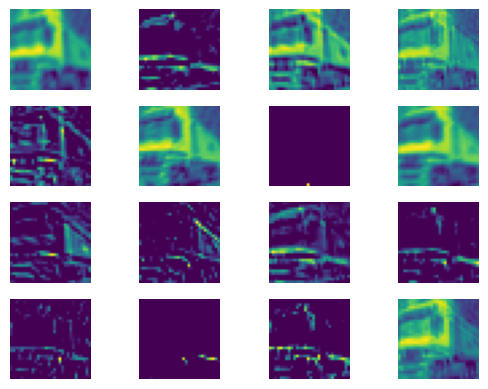

In [11]:
import numpy as np
single_image = train_images[1]
my_image_batch = np.expand_dims(single_image, axis=0)

# 1. Create a model that outputs the first layer's results
visual_model = models.Model(inputs=model.inputs, outputs=model.layers[0].output)

# 2. Give it an image (expanded to 4D to match batch requirements)
feature_maps = visual_model.predict(my_image_batch)

# 3. Plot the first 8 of the 32 feature maps
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()